In [2]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve, validation_curve, StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
# data paths for dataset
X_Cats = "./input/Dataset/cats/"
X_Dogs = "./input/Dataset/dogs/"

# Constant
IMAGE_RESIZE_SIZE = (200, 200, 3)


In [4]:
def train_data():
    """
    Method to preprocess the training data
    """
    images = []
    labels = []
    
    img_dog = []
    target_value_dog_images = []
    dogs_data = next(os.walk(X_Dogs))
    print(f'Train dog images count: {len(dogs_data[2])}')
    for file in dogs_data[2]:
        img_x = rgb2gray(resize(cv2.imread(dogs_data[0] + file), IMAGE_RESIZE_SIZE))
        img_x = np.ravel(img_x)
        img_dog.append(img_x)
        target_value_dog_images.append(0)
    
    images.extend(img_dog)
    labels.extend(target_value_dog_images)

    img_cat = []
    target_value_for_cat_data = []
    cats_data = next(os.walk(X_Cats))
    print(f'Train cat images count: {len(cats_data[2])}')
    for file in cats_data[2]:
        img_x = rgb2gray(resize(io.imread(cats_data[0] + file), IMAGE_RESIZE_SIZE))
        img_x = np.ravel(img_x)
        img_cat.append(img_x)
        target_value_for_cat_data.append(1)
   
    images.extend(img_cat)
    labels.extend(target_value_for_cat_data)
    images, labels = np.asarray(images), np.asarray(labels)
    
    return images, labels

In [5]:
def plot_learning_curve(
        estimator, X, y, title="Learning Curve", cv=None,
        train_sizes=np.linspace(0.1, 1.0, 5)
):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=-1,
                                                                         train_sizes=train_sizes, return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")

    plt.figure()
    plt.title("Scalability of the model")
    plt.xlabel("Training examples")
    plt.ylabel("Fit times (seconds)")
    plt.grid()
    plt.plot(train_sizes, fit_times.mean(axis=1), 'o-')
    plt.show()
    
    
def plot_validation_curve(estimator, X, y, param_name, param_range, scoring='accuracy', cv=5):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        scoring=scoring, cv=cv, n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(f"Validation Curve for {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.grid()

    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training score")

    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

## KNN Classification

In [6]:
# Training KNeighboursClassifier
training_images, training_labels = train_data()
neigh = KNeighborsClassifier()

Train dog images count: 348
Train cat images count: 349


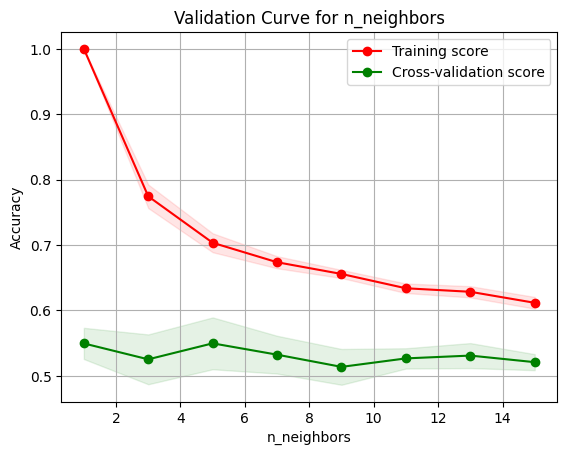

In [8]:
param_range_neighbors = [1, 3, 5, 7, 9, 11, 13, 15]
plot_validation_curve(
    estimator=neigh, X=training_images, y=training_labels, 
    param_name='n_neighbors', param_range=param_range_neighbors,
)

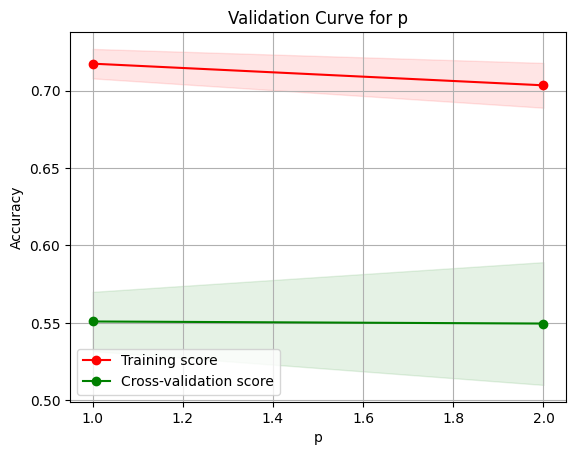

In [9]:
param_range_p = [1, 2]
plot_validation_curve(
    estimator=neigh, X=training_images, y=training_labels, 
    param_name='p', param_range=param_range_p,
)

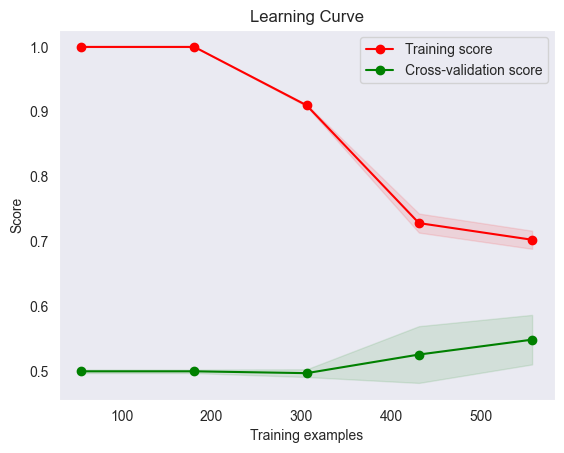

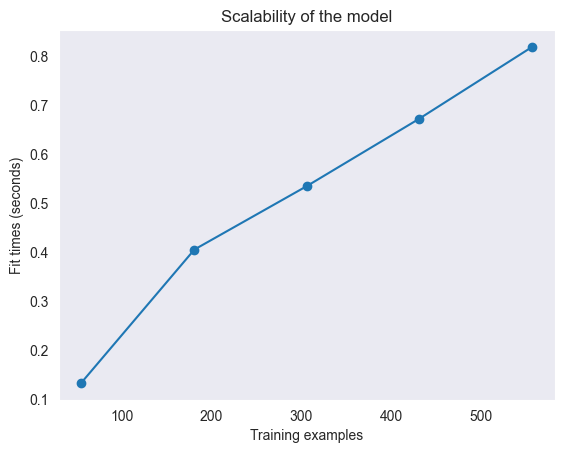

In [49]:
plot_learning_curve(neigh, training_images, training_labels, title="Learning Curve")

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(
    training_images, training_labels, test_size = 0.25, random_state = 0
)


In [20]:
# Redefine model with best params
neigh = KNeighborsClassifier(n_neighbors=7, p=2)
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [21]:
knn_score = neigh.score(X_test, Y_test)
knn_score

0.52

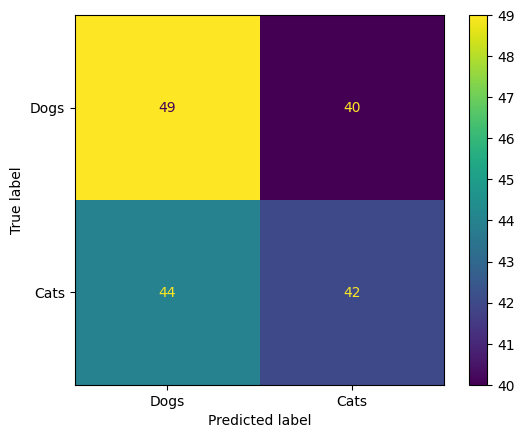

In [22]:
y_predict = neigh.predict(X_test)
confusion_matrix_data = confusion_matrix(y_true=Y_test, y_pred=y_predict)

confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data, display_labels=('Dogs', 'Cats'))
confusion_matrix_display.plot()
plt.show()

## SVM Classifier

Using rbf and linear kernels

### RBF SVC

In [23]:
rbf_svc = svm.SVC(kernel='rbf')

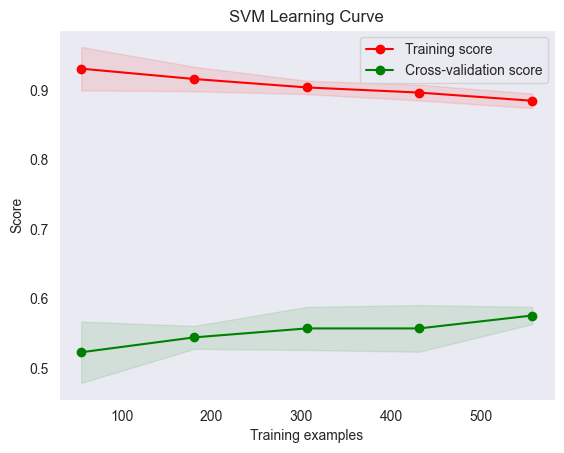

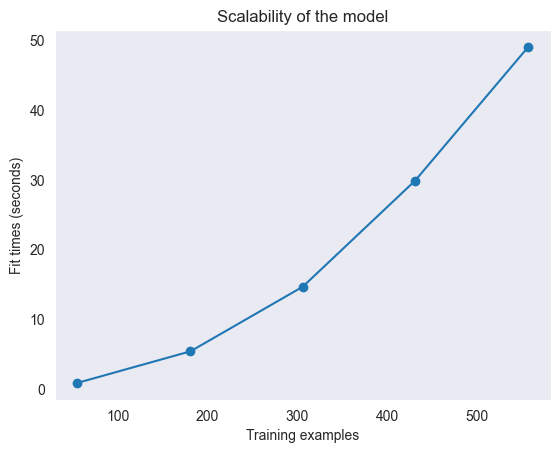

In [55]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
plot_learning_curve(rbf_svc, training_images, training_labels, title="SVM Learning Curve", cv=cv)

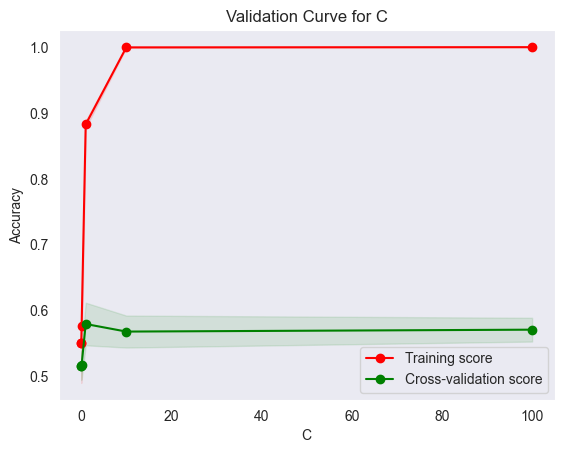

In [56]:
# Varying the regularization parameter (C)
param_range_C = np.logspace(-3, 2, 6)
plot_validation_curve(rbf_svc, training_images, training_labels, param_name="C", param_range=param_range_C)

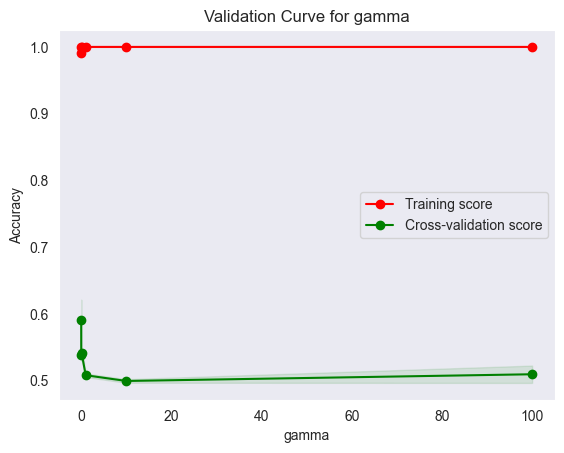

In [57]:
# Varying the gamma parameter for RBF kernel
param_range_gamma = np.logspace(-3, 2, 6)
plot_validation_curve(rbf_svc, training_images, training_labels, param_name="gamma", param_range=param_range_gamma)

In [31]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.1, C=0.01)
rbf_svc.fit(training_images, training_labels)
rbf_score = rbf_svc.score(X_test, Y_test)

In [32]:
rbf_score

0.49142857142857144

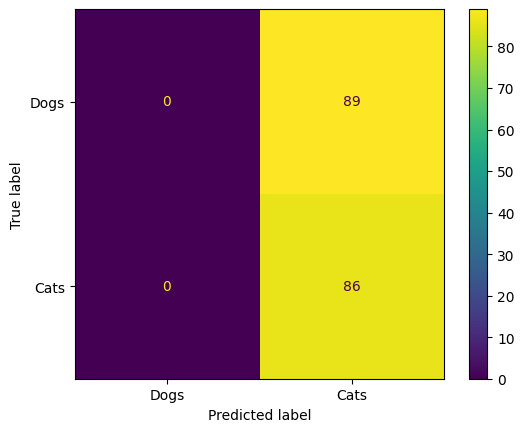

In [26]:
y_predict = rbf_svc.predict(X_test)
confusion_matrix_data = confusion_matrix(y_true=Y_test, y_pred=y_predict)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data, display_labels=('Dogs', 'Cats'))
confusion_matrix_display.plot()
plt.show()

## Linear SVC

In [34]:
linear_svc = svm.SVC(kernel='linear')

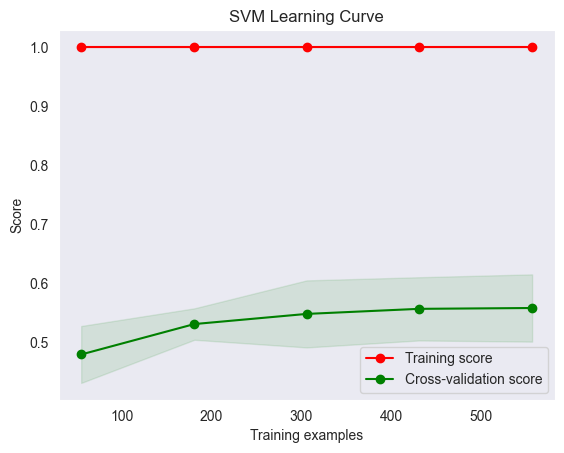

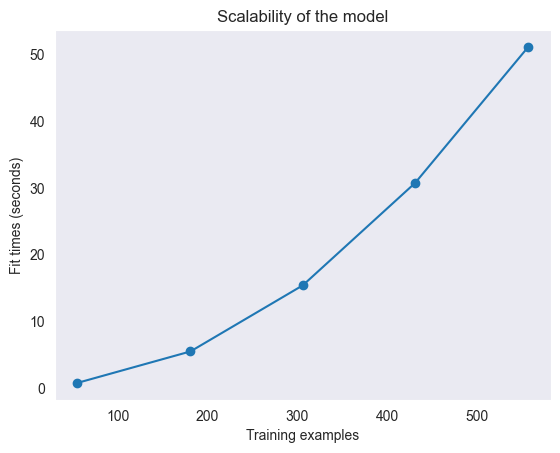

In [ ]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
plot_learning_curve(linear_svc, training_images, training_labels, title="SVM Learning Curve", cv=cv)

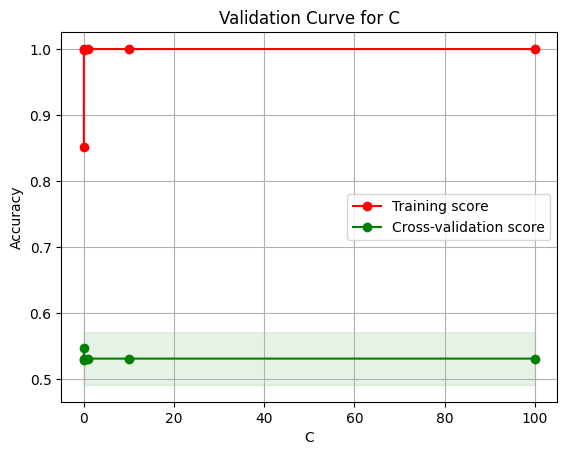

In [35]:
# Varying the C parameter
param_range_C = [0.001, 0.01, 0.1, 1, 10, 100]
plot_validation_curve(linear_svc, training_images, training_labels, param_name="C", param_range=param_range_C)

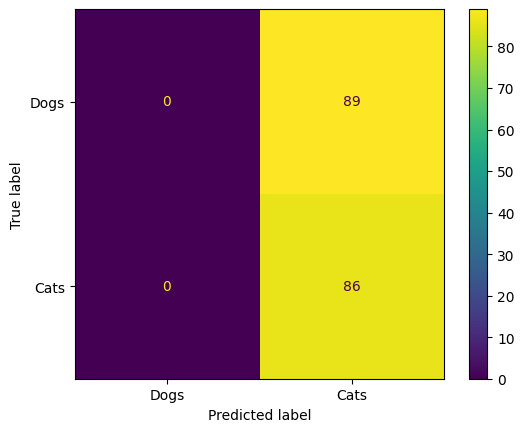

0.5257142857142857

In [36]:
linear_svc = svm.SVC(kernel='linear', C=0.01)
linear_svc.fit(X_train, Y_train)
y_predict = rbf_svc.predict(X_test)
confusion_matrix_data = confusion_matrix(y_true=Y_test, y_pred=y_predict)

confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix_data, display_labels=('Dogs', 'Cats')
)
confusion_matrix_display.plot()
plt.show()
linear_svc_score = linear_svc.score(X_test, Y_test)
linear_svc_score


## MLP Classifier

In [37]:
mlpc = MLPClassifier(max_iter=4000, random_state=42)

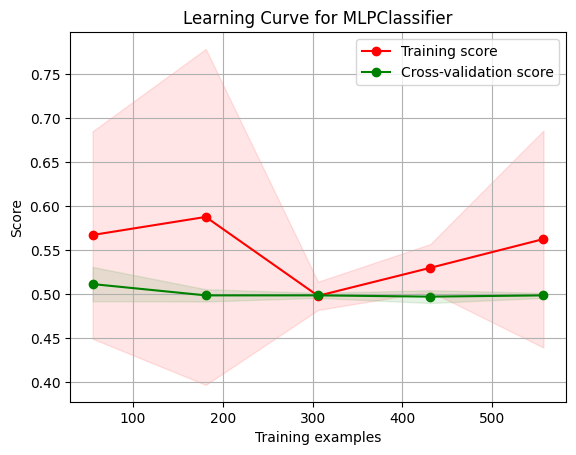

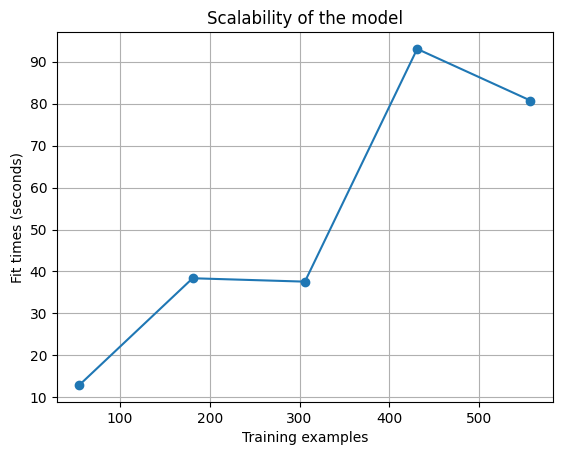

In [38]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
plot_learning_curve(mlpc, training_images, training_labels, title="Learning Curve for MLPClassifier", cv=cv)

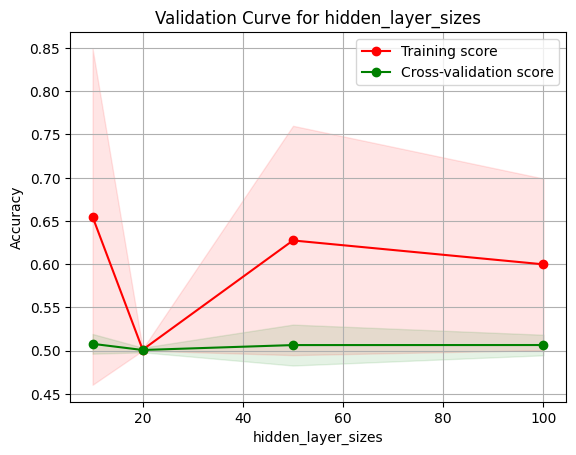

In [39]:
# Varying the number of hidden layers (neurons in the hidden layer)
param_range_hidden_layer_sizes = [10, 20, 50, 100]
plot_validation_curve(mlpc, training_images, training_labels, param_name="hidden_layer_sizes", param_range=param_range_hidden_layer_sizes)

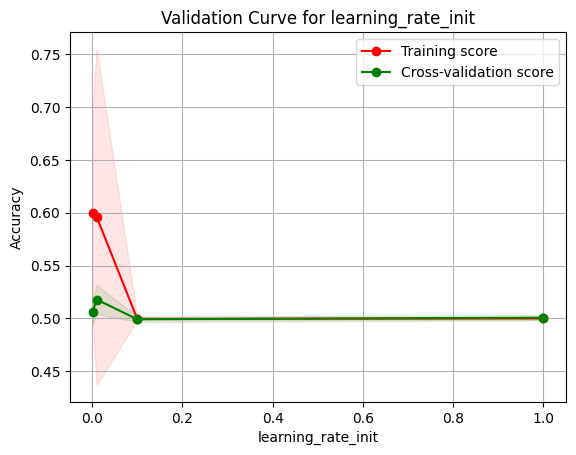

In [40]:
# Varying the learning rate
param_range_learning_rate = [0.001, 0.01, 0.1, 1.0]
mlp_learning_rate = MLPClassifier(max_iter=4000, random_state=42, hidden_layer_sizes=(100,))
plot_validation_curve(mlp_learning_rate, training_images, training_labels, param_name="learning_rate_init", param_range=param_range_learning_rate)

In [41]:
mlpc.fit(X_train, Y_train)
mlpc_score = mlpc.score(X_test, Y_test)
mlpc_score

0.5142857142857142

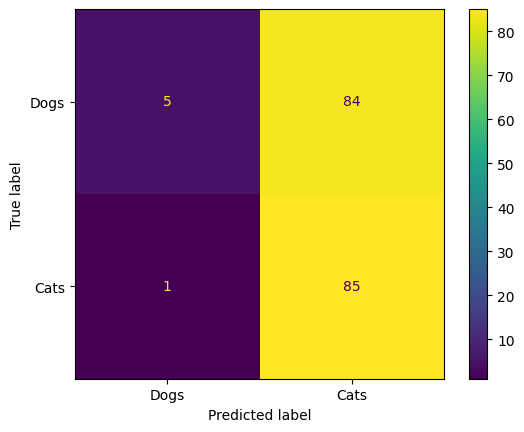

In [42]:
y_predict = mlpc.predict(X_test)
confusion_matrix_data = confusion_matrix(y_true=Y_test, y_pred=y_predict)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data, display_labels=('Dogs', 'Cats'))
confusion_matrix_display.plot()
plt.show()

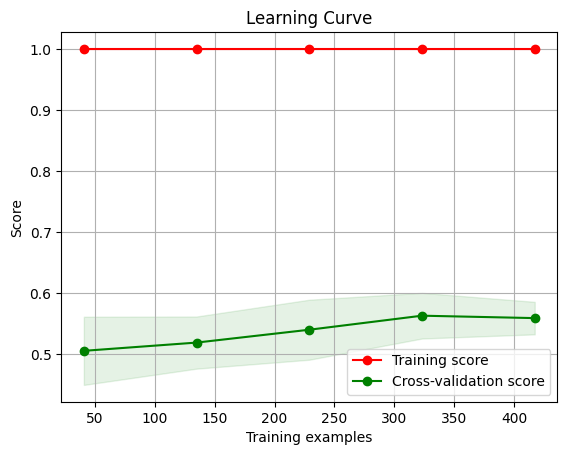

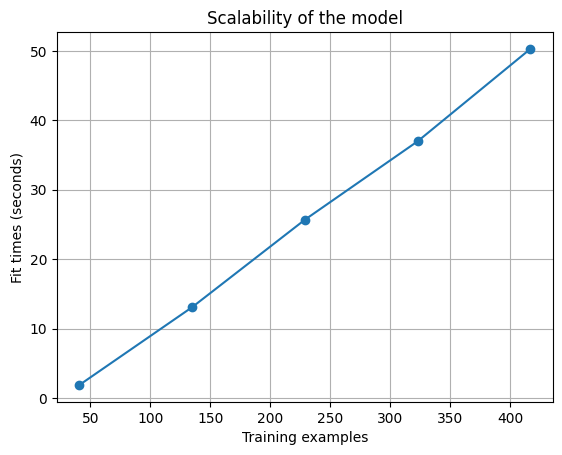

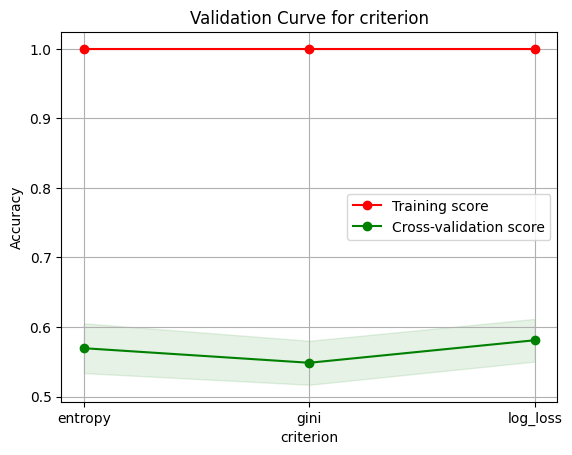

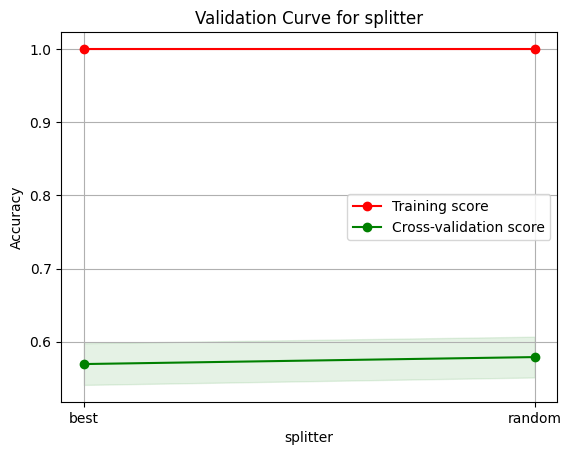

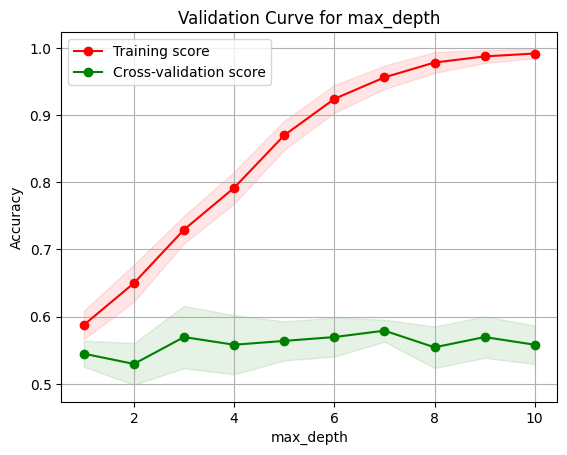

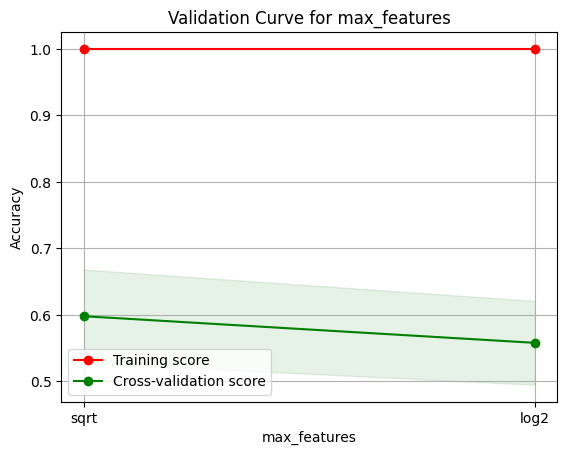

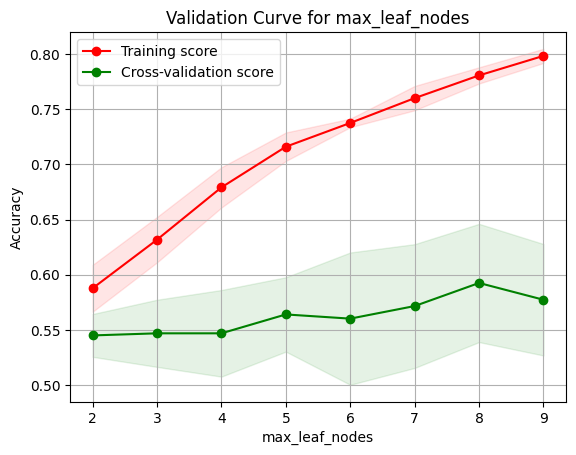

In [43]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
plot_learning_curve(decision_tree, X_train, Y_train, title="Learning Curve")

parameters = {
    'criterion': ['entropy', 'gini', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9]
}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for parameter, param_range in parameters.items():
    plot_validation_curve(
        estimator=decision_tree, X=X_train, y=Y_train,
        param_name=parameter, param_range=param_range,
        cv=cv
    )

[[61 28]
 [60 26]]


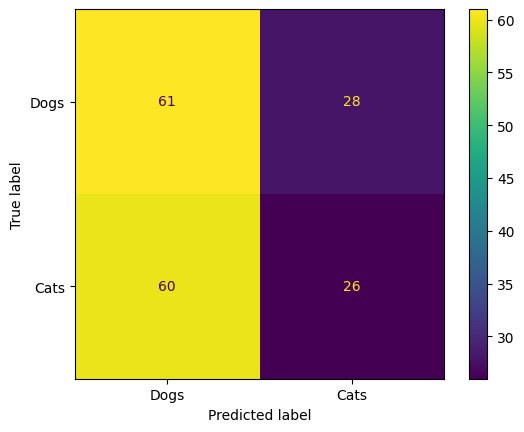

In [46]:
decision_tree = DecisionTreeClassifier(
    criterion='gini', splitter='random', max_depth=3, max_features='log2', max_leaf_nodes=5
)
decision_tree.fit(X_train, Y_train)
decision_tree_score = decision_tree.score(X_test, Y_test)

y_predict = decision_tree.predict(X_test)
confusion_matrix_data = confusion_matrix(y_true=Y_test, y_pred=y_predict)

confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data, display_labels=('Dogs', 'Cats'))
confusion_matrix_display.plot()
print(confusion_matrix_data)

In [47]:
def plot_model_comparison(model_names, scores, metric_name='Accuracy'):
    """
    Function to plot a bar chart comparing multiple models based on a specified evaluation metric.
    """
    plt.figure(figsize=(10, 6))
    bar_positions = np.arange(len(model_names))

    plt.bar(bar_positions, scores, align='center', alpha=0.7, color='skyblue', edgecolor='blue')
    plt.xticks(bar_positions, model_names, rotation=45, ha='right')
    plt.xlabel('Models', fontsize=12)
    plt.ylabel(metric_name, fontsize=12)
    plt.title(f'Comparison of {metric_name} for Multiple Models', fontsize=14)

    for i, score in enumerate(scores):
        plt.text(i, score + 0.01, f'{score:.2f}', ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

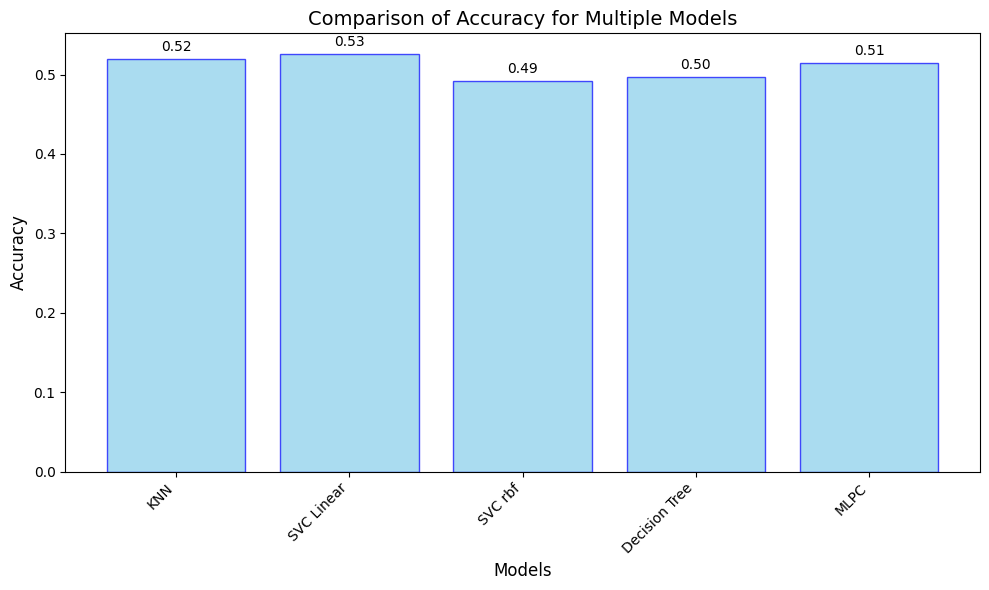

In [48]:
models_names = ['KNN', "SVC Linear", 'SVC rbf', 'Decision Tree', 'MLPC']
models_scores = [knn_score, linear_svc_score, rbf_score, decision_tree_score, mlpc_score]
plot_model_comparison(models_names, models_scores)